# Pruebas del FW

None_volatility_20 0 0.21780651083446315
          time  volatility_20
0   2023-01-01            NaN
1   2023-01-02            NaN
2   2023-01-03            NaN
3   2023-01-04            NaN
4   2023-01-05            NaN
..         ...            ...
195 2023-07-15       0.152005
196 2023-07-16       0.157491
197 2023-07-17       0.154085
198 2023-07-18       0.155555
199 2023-07-19       0.124420

[200 rows x 2 columns]


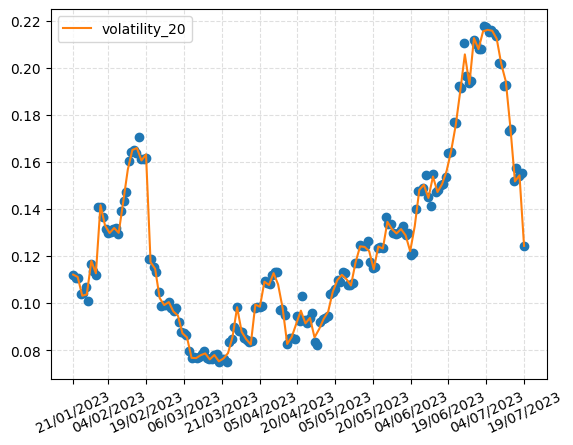

In [1]:
from src.analisis_modelizacion import *
from src.graphic_generator import pinta

t1 = serie_x(data_or_path='data/Datos_Fase1.xlsx', hoja='data_volati', numero_registros=200, val_p=0.002)
# print(t1)
t1.volatilidad(column_name='value', grupo=20)
pinta([t1], [['volatility_20']])
print(t1[['time', 'volatility_20']])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0]


/tmp/ipykernel_1715/2886840888.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')  # Usa el método de rellenar hacia adelante para rellenar NaN con el último valor válido


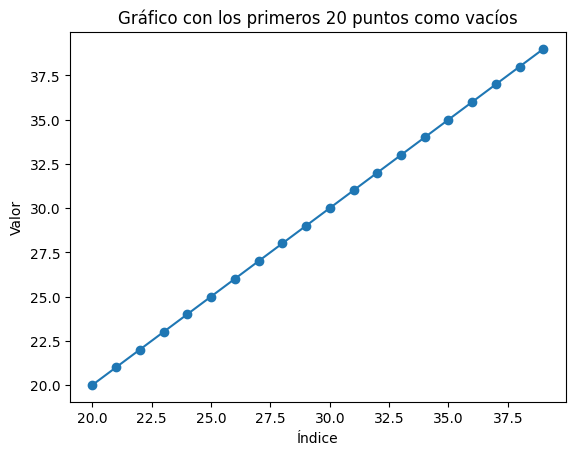

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con una columna que tiene los primeros 20 elementos como NaN
data = {'A': [np.nan] * 20 + list(range(20, 40))}
df = pd.DataFrame(data)

# Rellenar los valores NaN con otro valor que no se muestre en el gráfico
df_filled = df.fillna(method='ffill')  # Usa el método de rellenar hacia adelante para rellenar NaN con el último valor válido

# Crear una lista de valores NaN para los primeros 20 puntos
primeros_n = 20
valores_nan = [np.nan] * primeros_n

# Concatenar la lista de valores NaN con los valores reales
valores_completos = valores_nan + df_filled['A'].tolist()[primeros_n:]
print(valores_completos)
# Graficar la columna A con los primeros 20 puntos como vacíos
plt.plot(valores_completos, marker='o')  # Utiliza marcadores para señalar los puntos
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico con los primeros 20 puntos como vacíos')
plt.show()


# Informacion mutua

In [ ]:
import numpy as np
def informacion_mutua(conjunto_x, conjunto_y):
    len_x = len(conjunto_x)
    len_y = len(conjunto_y)
    for x in conjunto_x:
        for y in conjunto_y:
            valor = p_xy*np.log(p_xy/(p_x*p_y))
            

In [1]:
n = 5
for ix in range(n):  
    for jx in range(ix+1,n):
        # print(ix, jx,'/n')
       matMI[ix,jx]= calc_MI(A[:,ix],A[:,jx])

0 1 /n
0 2 /n
0 3 /n
0 4 /n
1 2 /n
1 3 /n
1 4 /n
2 3 /n
2 4 /n
3 4 /n


[  7  26  76 155 233 228 162  80  26   7] 10 [-3.04824739 -2.44034686 -1.83244634 -1.22454581 -0.61664528 -0.00874476
  0.59915577  1.20705629  1.81495682  2.42285735  3.03075787] 11


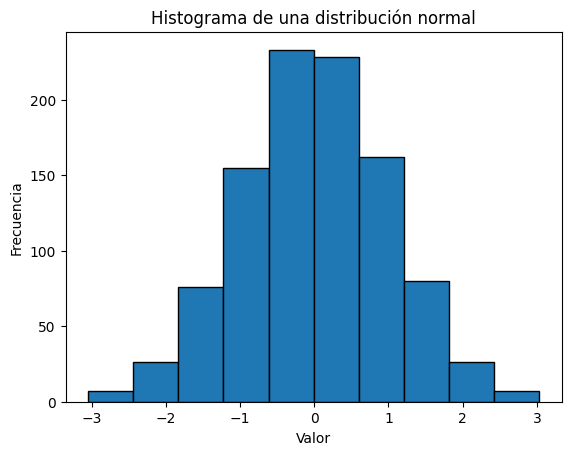

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos aleatorios de una distribución normal
# np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)
# print(data)
# Calcular el histograma
hist, bins = np.histogram(data, bins=10)
print(hist, len(hist), bins, len(bins))
# Visualizar el histograma
plt.hist(data, bins=10, edgecolor='black')
plt.title('Histograma de una distribución normal')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


In [55]:
import numpy as np

def calcular_informacion_mutua(x, y, bins):
    # Calcular las probabilidades de ocurrencia de cada valor en x e y
    px = np.histogram(x, bins=bins, density=True)[0]
    py = np.histogram(y, bins=bins, density=True)[0]
    print(np.arange(np.max(x)+2))
    # Calcular la matriz conjunta de probabilidades
    pxy = np.histogram2d(x, y, bins=bins, density=True)[0]

    # Calcular la información mutua
    informacion_mutua = 0
    for i in range(len(px)):
        for j in range(len(py)):
            if pxy[i][j] > 0 and px[i] > 0 and py[j] > 0:
                informacion_mutua += pxy[i][j] * np.log2(pxy[i][j] / (px[i] * py[j]))
    informacion_mutua = informacion_mutua
    return informacion_mutua

def calc_MI(X,Y,bins):
    c_XY = np.histogram2d(X,Y,bins)[0]
    c_X = np.histogram(X,bins)[0]
    c_Y = np.histogram(Y,bins)[0]
    print(c_X)
    print(c_Y)
    print(c_XY)
    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)
 
    MI = H_X + H_Y - H_XY
    return MI
 
def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

from scipy.stats import chi2_contingency


def calc_MI_scipy(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    mi_bits = mi/np.log(2)
    return mi_bits

from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression


def calc_MI_sklearn_1(x, y, bins):
    c_x = np.histogram(x,bins)[0]
    c_y = np.histogram(y,bins)[0]
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(labels_true=None, labels_pred=None, contingency=c_xy)
    mi_bits = mi/np.log(2)
    return mi_bits

def calc_MI_sklearn_3(x,y,bins):
    mi = mutual_info_classif(x,y,n_neighbors=bins)
    mi_bits = mi
    return mi_bits

def calc_MI_sklearn_2(df):
    # c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_regression(df['x'].to_frame(), df['y'], discrete_features=[False])
    # mi_bits = mi*np.log(2)
    return mi

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generar datos de ejemplo
np.random.seed(0)
n = 100
bin = 10
x = np.random.randn(n)
y = np.random.randn(n)

print('x: ', x)
print('y: ', y)
df = pd.DataFrame({'x':x,'y':y})
info = calc_MI(x,y,bin)
info_scipy = calc_MI_scipy(x,y,bin)
info_sklearn = calc_MI_sklearn_1(x,y,bin)
info_sklearn2 = calc_MI_sklearn_2(df)
# info_sklearn3 = calc_MI_sklearn_3(x,y,bin)
infor_mutua = calcular_informacion_mutua(x,y,bin)
 
print('info:          ',info)
print('info_scipy:    ',info_scipy)
print('info_sklearn:  ',info_sklearn)
print('info_sklearn2: ',info_sklearn2)
# print('info_sklearn3: ',info_sklearn3)
print('info_mutua:    ',infor_mutua)

x:  [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.9008264

# Metodo para gestionar credenciales

In [ ]:
import yaml

def load_credentials(file_path):
    with open(file_path, 'r') as file:
        credentials = yaml.safe_load(file)
    return credentials

def get_credentials(application_name, file_path):
    credentials = load_credentials(file_path)
    if application_name in credentials:
        return credentials[application_name]
    else:
        print(f"Credenciales para la aplicación '{application_name}' no encontradas.")
        return None

if __name__ == "__main__":
    credentials_file = '/home/ubu/crede.yml'
    
    # Obtener las credenciales para una aplicación específica
    app_name = 'GitHub'
    app_credentials = get_credentials(app_name, credentials_file)
    if app_credentials:
        print(f"Credenciales para '{app_name}':")
        print(f"Usuario: {app_credentials['Username']}")
        print(f"Contraseña: {app_credentials['Password']}")


# Pruebas con funciones

## plotly.graph_objects

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image

import os
import datetime

def pinta_px(tablas, columnas):
    # Crear la carpeta 'Exportaciones' si no existe
    carpeta_exportaciones = 'temp_graficas'
    if not os.path.exists(carpeta_exportaciones):
        os.makedirs(carpeta_exportaciones)
    
    # Inicializar la figura
    fig = go.Figure()    
    
    for i in range(len(tablas)):
        tabla = tablas[i]
        # Extraer el nombre de la tabla
        nombre_tabla = [nombre for nombre, valor in globals().items() if valor is tabla][0]

        # Crear la ruta completa para guardar la figura
        ruta_figura = os.path.join(carpeta_exportaciones, f'{nombre_tabla}_{"_".join(columnas[i])}.png')
        
        for columna in columnas[i]:
            # Extraer datos de la tabla
            x = pd.to_datetime(tabla['time'])#.apply(lambda x: x.timestamp()).to_numpy()
            # print('columna:', columna)
            y = tabla[columna].to_numpy()  # Columna a graficar
    
            # Eliminar elementos nulos
            x = x[~np.isnan(y)]
            y = y[~np.isnan(y)]
            # print(len(x), len(y))
            # print(x, y)
            if len(y) == 0:
                print(f'No se ha podido graficar la {nombre_tabla}_{columna}')
                continue
            
            fig.add_trace(go.Scatter(x= x, y= y))
            
    
            # Graficar los resultados
            
        
    # Personalizar ejes
    # plt.xlabel('Eje X')  # Nombre del eje X
    # plt.ylabel('Eje Y')  # Nombre del eje Y
    # plt.title('\n'.join(columnas[i]))                  # Título de la gráfica
    # plt.axhline(0, color='black',linewidth=0.5)     # Línea horizontal en y=0
    # plt.axvline(25, color='black',linewidth=0.5)     # Línea vertical en x=0
    # plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')  # Agregar malla horizontal
    
    # Modificar límites de los ejes
    # plt.xlim(-2*np.pi, 2*np.pi)
    # plt.ylim(-1.5, 1.5)
    
    # Añadir leyenda
    # plt.legend()
    
    # Guardar figura
    # plt.savefig(ruta_figura)
    img_bytes = fig.to_image(format="png", width=600, height=350, scale=2)
    Image(img_bytes)
    print(Image)
    # Mostrar la gráfica
    # fig.show()




In [ ]:
# print('estamos en:',os.getcwd())

serie_z = pd.read_csv('serie_z.csv', index_col=0)
# print(serie_z)

pinta_px([serie_z],[['entropia']])

## matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
x2 = np.linspace(0,33,100)
y1 = np.sin(x)
y2 = np.sin(x)

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar los datos
ax.plot(x, y1, label='sin(x)')
ax.plot(x, y2, label='cos(x)')

# # Personalizar los valores en el eje x
# nombres_xticks = ['Inicio', 'Medio', 'Fin']  # Nuevos nombres para los ticks en el eje x
# posiciones_xticks = [0, 50, 100]  # Posiciones donde quieres colocar los nuevos ticks en el eje x

# # Establecer los nuevos nombres de los ticks en el eje x
# ax.set_xticks(posiciones_xticks)
# ax.set_xticklabels(nombres_xticks)

# Agregar leyenda
ax.legend()

# Mostrar la figura
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objects as go

import os
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import datetime

def pinta(tablas, columnas):
    # print('_____________________________________________________________\n_____________________________________________________________\n\n')
    # Crear la carpeta 'Exportaciones' si no existe
    carpeta_exportaciones = os.path.join('temp','graficas')
    if not os.path.exists(carpeta_exportaciones):
        os.makedirs(carpeta_exportaciones)
    
    # Inicializar la figura
    fig, ax = plt.subplots() 
    
    for i in range(len(tablas)):
        tabla = tablas[i]
        # print('tabla:\n', tabla)

        # Extraer el nombre de la tabla
        nombre_tabla = os.environ.get("nombre_evento")# [nombre for nombre, valor in globals().items() if valor is tabla][0]
        # print(nombre_tabla, columnas)
        
        # Crear la ruta completa para guardar la figura
        ruta_figura = os.path.join(carpeta_exportaciones, f'{nombre_tabla}-{"-".join(columnas[i])}.png')
        # print(ruta_figura)

        for columna in columnas[i]:
            # print('columna:\n', columna)
            # Extraer datos de la tabla
            # print(tabla.columns)
            x = pd.to_datetime(tabla['time']).apply(lambda x: x.timestamp()).to_numpy()
            # print('columna:', columna)
            y = tabla[columna].to_numpy()  # Columna a graficar
            # print(type(x), type(y))
            # print(len(x), len(y))
    
            # Eliminar elementos nulos
            x = x[~np.isnan(y)]
            y = y[~np.isnan(y)]
            # print(len(x), len(y))
            # print(x,'\n', y)
            if len(y) == 0:
                print(f'No se ha podido graficar la {nombre_tabla}_{columna}')
                continue
    
            dom_ini = x[0]
            dom_fin = x[-1]
            
            # Generar nuevos puntos para la interpolación
            xs = np.linspace(dom_ini, dom_fin, 100)
            fec_x = pd.to_datetime(x, unit='s')
            fec_xs = pd.to_datetime(xs, unit='s')
            # print(fec_x, fec_xs)
            try:    
                # Intentar la interpolación cuadrática
                f_interp = interp1d(x, y, kind='quadratic')     # Puedes cambiar 'linear' a 'cubic', 'quadratic', etc.
                ys_interp = f_interp(xs)
                ys_interp = f_interp(xs)
            except ValueError:
                # En caso de error, realizar la interpolación lineal
                # print(f'Interpolación cuadrática fallida para {nombre_tabla}_{columna}. Realizando interpolación lineal.')
                f_interp = interp1d(x, y, kind='linear')
                ys_interp = f_interp(xs)
            # # Interpolación polinómica usando el método scipy
            # f_interp = interp1d(x, y, kind='cuadratic')  
    
            # Graficar los resultados
            ax.plot(x, y, 'o')#, label=f'Data- {columna}')         #creo que hay qeu cambiarlo aqui
            ax.plot(xs, ys_interp, label=f'{columna}')
    # print(len(fec_x), len(fec_xs))
    # print(fec_x, fec_xs)
    # n =  10 # por ejemplo, cada 7 días
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(n))  # Establecer el intervalo de los ticks a semanal
    # # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha
    # ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    # Personalizar ejes
    # plt.xlabel('Eje X')  # Nombre del eje X
    # plt.ylabel('Eje Y')  # Nombre del eje Y
    # ax.title('\n'.join(columnas[i]))                  # Título de la gráfica
    # plt.axhline(0, color='black',linewidth=0.5)     # Línea horizontal en y=0
    # plt.axvline(25, color='black',linewidth=0.5)     # Línea vertical en x=0
    ax.grid(axis='y', linestyle='--', alpha=0.7, which='both')  # Agregar malla horizontal
    
    # Modificar límites de los ejes
    # plt.xlim(x[0], x[-1])
    # plt.ylim(-1.5, 1.5)

    # # Establecer los nuevos nombres de los ticks en el eje x
    fec_x_formateada = [fecha.strftime('%d/%m/%Y') for fecha in fec_x]
    ax.set_xticks(x)
    ax.set_xticklabels(fec_x_formateada)

    # Añadir leyenda
    ax.legend()
    plt.xticks(rotation=25)     
    # Guardar figura
    plt.savefig(ruta_figura)
    
    # Mostrar la gráfica
    plt.show()

serie_z = pd.read_csv('serie_z.csv', index_col=0)
# print(serie_z)

pinta([serie_z],[['viscosity', 'viscosity ABE']])